In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles

# Generate dataset with label noise and overlap
X_raw, y_raw = make_classification(
    n_samples=400,
    n_features=2,           # only 2 features so you can plot
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.15,            # 15% label noise
    class_sep=0.5,          # low separation -> overlapping classes
    random_state=1
)

# Reshape for your model
X = X_raw.T                # (2, 400)
y = y_raw.reshape(1, -1)   # (1, 400)


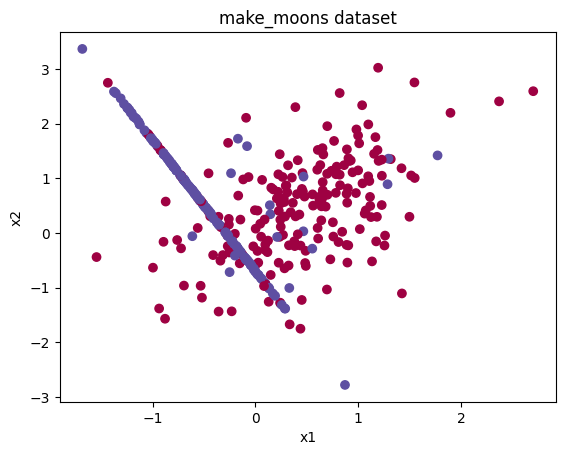

In [3]:
import matplotlib.pyplot as plt

# Assuming X and y are in shape (2, n_samples) and (1, n_samples)
X_vis = X.T      # shape: (n_samples, 2)
y_vis = y.T      # shape: (n_samples, 1)

plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis[:, 0], cmap=plt.cm.Spectral)
plt.title("make_moons dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [4]:
print(X.shape)
input_layer = X.shape[0]

(2, 400)


In [5]:
import sys
import os
import import_ipynb

sys.path.append(os.path.abspath("L_layer_deeplearning_class"))
from L_layer_neuron_net import L_layer_NN

In [6]:
def plot_decision_boundary(model, X, y, steps=1000, cmap=plt.cm.Spectral):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = (x_max - x_min) / steps

    # Create meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Stack coordinates into shape (2, num_points)
    grid = np.c_[xx.ravel(), yy.ravel()].T

    # Predict using the class method
    Z = model.predict(grid)  # shape: (1, num_points)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)
    plt.scatter(X[0, :], X[1, :], c=y[0, :], cmap=cmap, edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

Training: 100%|█████████████████████████████████████████| 3000/3000 [00:13<00:00, 219.05it/s, Cost=0.47289249837688574]


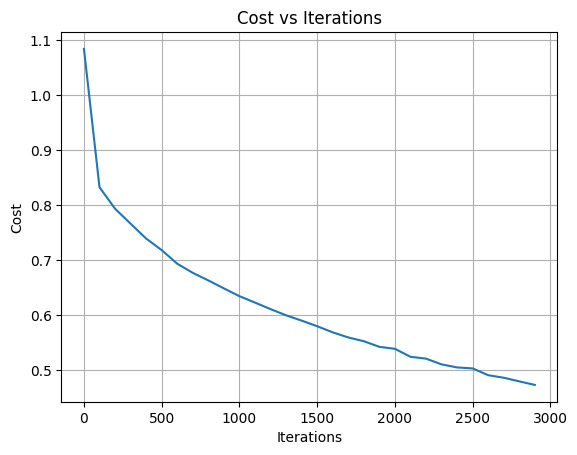

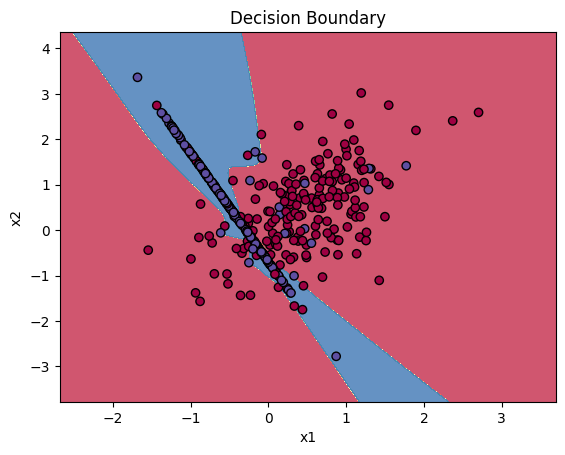

In [8]:
# Define architecture
layers_dims = [X.shape[0], 100, 100, 50, 20, 1]

# Create and train model
model = L_layer_NN(layer_dims=layers_dims, learning_rate=0.1, lambd=0.7)
model.train(X, y, iterations=3000, print_cost=True)

# Plot cost graph
model.plot_cost()

# Plot decision boundary
plot_decision_boundary(model, X, y)